In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_1 = np.array([12, 19])
mean_2 = np.array([-10, -20])

In [3]:
cov_1 = np.array([[1,15],[15,1]])
cov_2 = np.array([[1,10],[10,1]])

In [4]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000) #Multivariate means distribution with more than 1 dimesnsions
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000) 

C:\Users\91882\AppData\Local\Temp\ipykernel_21304\1800173775.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 1000) #Multivariate means distribution with more than 1 dimesnsions
C:\Users\91882\AppData\Local\Temp\ipykernel_21304\1800173775.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 1000)


In [5]:
dist_1.shape, dist_2.shape

((1000, 2), (1000, 2))

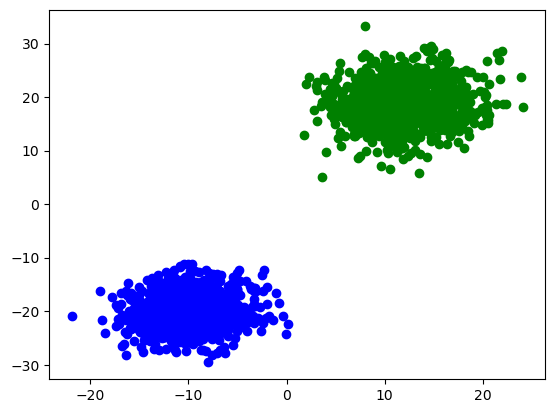

In [6]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'green')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'blue')

In [7]:
dist_1, dist_2

(array([[16.88618469, 21.04013364],
        [11.86297193, 23.39944413],
        [15.94982213, 22.84668575],
        ...,
        [16.10446088, 17.2295384 ],
        [10.8018409 , 14.12321027],
        [ 8.44746513, 20.82715907]]),
 array([[-12.89279149, -21.12853177],
        [-10.00673086, -19.49936443],
        [ -7.9990483 , -14.98316041],
        ...,
        [-13.46178953, -18.83555117],
        [-10.21959674, -15.45578684],
        [-11.24405179, -20.81001909]]))

In [8]:
dataset = np.zeros((2000, 3))

#Filling the rows in the data set and filing the first two column and leaving the 
#last i.e. last column to be fille dby 0 and  1 

dataset[:1000, :-1] = dist_1 #[rows, column]
dataset[1000: , :-1] = dist_2
dataset[1000: , -1] = 1  # 0 - 999 (0) and 1000: (1)

In [9]:
print(dataset[:10])

[[16.88618469 21.04013364  0.        ]
 [11.86297193 23.39944413  0.        ]
 [15.94982213 22.84668575  0.        ]
 [ 6.6289246  14.45126851  0.        ]
 [ 8.45403609 22.04667192  0.        ]
 [10.77401517 20.79601274  0.        ]
 [16.42189215 16.70749319  0.        ]
 [ 7.72092031 20.97487531  0.        ]
 [19.70989617 21.17710686  0.        ]
 [ 7.9517102  19.33054981  0.        ]]


In [10]:
u = np.mean(dataset[:, : -1], axis = 0)
std = np.std(dataset[:, : -1], axis = 0)
dataset[:, : -1] = (dataset[:, : -1] - u)/std

In [11]:
print(dataset[:10])

[[1.38287266 1.08154621 0.        ]
 [0.94515088 1.20028005 0.        ]
 [1.30127821 1.17246213 0.        ]
 [0.48905701 0.74995727 0.        ]
 [0.64809687 1.13220091 0.        ]
 [0.8502594  1.06926067 0.        ]
 [1.3424143  0.86350325 0.        ]
 [0.58421331 1.07826205 0.        ]
 [1.62893033 1.08843948 0.        ]
 [0.60432429 0.99551029 0.        ]]


In [12]:
ones = np.ones((dataset.shape[0], 1))      #(row , column)
dataset = np.hstack((ones, dataset))

In [13]:
np.random.shuffle(dataset)

In [14]:
print(dataset[:10])

[[ 1.         -1.16038169 -0.73004313  1.        ]
 [ 1.         -0.56105715 -0.66130892  1.        ]
 [ 1.         -0.71119108 -0.7466523   1.        ]
 [ 1.         -0.66243246 -0.95280455  1.        ]
 [ 1.         -0.72364403 -0.99887521  1.        ]
 [ 1.          1.24568836  1.10682706  0.        ]
 [ 1.         -0.37355544 -0.86893523  1.        ]
 [ 1.          1.34407562  1.19517488  0.        ]
 [ 1.         -1.21123068 -1.06350953  1.        ]
 [ 1.         -1.19765501 -1.23920148  1.        ]]


In [15]:
split = 0.8

train_X = dataset[:int(split * dataset.shape[0]), :-1]
test_X = dataset[int(split * dataset.shape[0]):, :-1]
train_Y = dataset[:int(split * dataset.shape[0]), -1]
test_Y = dataset[int(split * dataset.shape[0]):, -1]

In [16]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(1600, 3) (400, 3) (1600,) (400,)


In [17]:
#for prediction of value
def hypothesis(X, weights):
    return 1 / (1 + np.exp(-1 * np.dot(X, weights)))

In [18]:
def loss_func(X, weights, Y):         
    Y_pred = hypothesis(X, weights)
    loss = np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
        
    # Here taking mean and dividing by X.shape[0] works as the same
    
    return -1 * loss

In [19]:
def gradient(X, Y, weights):    
    y_pred = hypothesis(X, weights) 
    
    grad = np.dot(X.T, (Y - y_pred)) 
        
    return grad/X.shape[0]

In [20]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.03
    loss_epoch = []
    
    epochs = 10000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        weights = weights + lr_rate * grad
        
    return weights, loss_epoch

In [21]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

1.2628350257873535


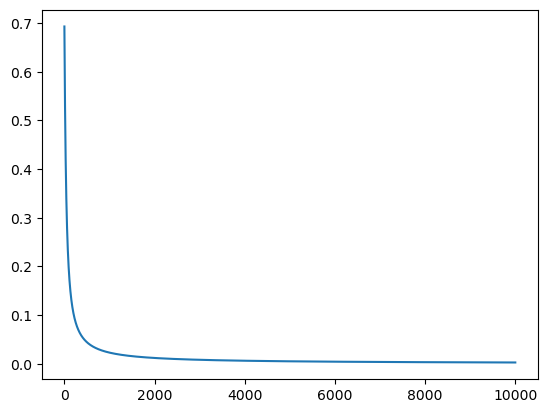

In [22]:
plt.plot(loss_epoch)

In [23]:
loss_epoch[:5]

[0.6931471805599452,
 0.6791743869521492,
 0.6656050254248903,
 0.6524272256730015,
 0.6396293097957233]

In [24]:
weights

array([-0.06284231, -3.20570637, -3.63444691])

In [27]:
X = np.arange(-20, 30)
Y = -(weights[1] * X + weights[0])/weights[2]

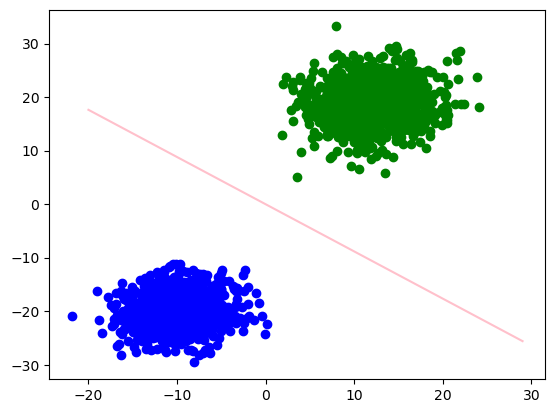

In [28]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'green')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'blue')
plt.plot(X, Y, color = 'pink')

In [29]:
def predict(X, weights):
    pred = hypothesis(X, weights)
    
    if pred > 0.5:
        return 1
    else:
        return 0
    

In [30]:
print(predict(test_X[0], weights), test_Y[0])

1 1.0


In [31]:
corr = 0 
for i in range (test_X.shape[0]):
    pred = predict(test_X[i], weights)
    
    if pred == test_Y[i]:
        corr +=1
print(corr/test_X.shape[0])

1.0
